In [1]:
import random

random_numbers = random.sample(range(1, 69), 25)
print(random_numbers)

[29, 23, 33, 43, 11, 10, 31, 45, 14, 61, 20, 38, 62, 7, 21, 3, 8, 37, 15, 60, 22, 67, 39, 47, 40]


In [2]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import os

random_numbers = [6, 20, 22, 16, 63, 52, 48, 53, 1, 18, 9, 17, 41, 24, 35, 40, 45, 36, 30, 15, 47, 2, 66, 10, 7]

# 数据文件夹的路径
data_dir = "PIE"  # 请替换成包含所有子文件夹的实际路径

my_data_dir = "0I_bw"  # 您自己的数据文件夹

# 用于存储所选的文件夹
selected_folders = []

# 遍历数据文件夹，选择与随机数字相对应的文件夹
for folder_name in os.listdir(data_dir):
    if int(folder_name) in random_numbers:
        selected_folders.append(folder_name)

# 加载数据
data = []
labels = []

for folder_name in selected_folders:
    folder_path = os.path.join(data_dir, folder_name)
    label = int(folder_name)

    image_files = os.listdir(folder_path)
    random.shuffle(image_files)

    for image_filename in image_files[:]:
        image_path = os.path.join(folder_path, image_filename)
        data.append(image_path)
        labels.append(label)

# 从0I_bw文件夹中加载数据
my_data = []
my_labels = []

my_image_files = os.listdir(my_data_dir)
random.shuffle(my_image_files)

for image_filename in my_image_files[:]:
    image_path = os.path.join(my_data_dir, image_filename)
    my_data.append(image_path)
    my_labels.append(0)

# 合并数据和标签
data += my_data
labels += my_labels

# 向量化图像数据
images = [plt.imread(image_path) for image_path in data]
X = np.array(images)

print(X.shape)

(4260, 32, 32)


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义 CNN 模型
class My_CNN(nn.Module):
    def __init__(self):
        super(My_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(20, 50, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(50 * 5 * 5, 500)
        self.fc2 = nn.Linear(500, 26)  # 最后一层节点数为 26

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x.unsqueeze(1))))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = x.view(-1, 50 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


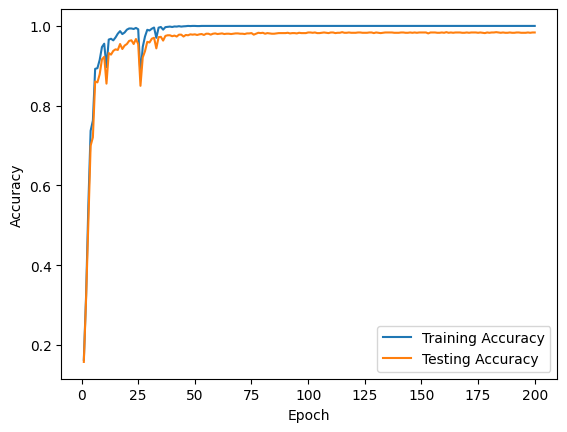

In [5]:
from sklearn.model_selection import *
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

my_CNN = My_CNN().float()
num_epochs = 200

# 创建一个字典，将原始标签映射到连续的整数
label_mapping = {label: idx for idx, label in enumerate(set(labels))}

# 使用映射得到新的连续标签
mapped_labels = [label_mapping[label] for label in labels]

X_train, X_test, y_train, y_test = train_test_split(X, mapped_labels, test_size=0.3, random_state=42, stratify=labels)
# Convert data to torch tensors
X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_test = torch.tensor(y_train), torch.tensor(y_test)

# 创建 PyTorch Dataset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# 创建 PyTorch DataLoader
batch_size = 64  # 设置你的批次大小
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define a loss function and an optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(my_CNN.parameters(), lr=0.001)

# 存储训练和测试准确率
train_accuracy_history = []
test_accuracy_history = []

# 在训练和测试中使用 DataLoader
for epoch in range(num_epochs):
    print(epoch)
    for batch_data, batch_labels in train_loader:
        optimizer.zero_grad()
        outputs = my_CNN(batch_data)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
    # 在测试中使用 DataLoader
    all_predicted, all_labels = [], []
    test_predicted, test_labels = [], []
    with torch.no_grad():
        for batch_data, batch_labels in test_loader:
            outputs = my_CNN(batch_data)
            _, predicted = torch.max(outputs, 1)
            test_predicted.extend(predicted.tolist())
            test_labels.extend(batch_labels.tolist())
            
    with torch.no_grad():
        for batch_data, batch_labels in train_loader:
            outputs = my_CNN(batch_data)
            _, predicted = torch.max(outputs, 1)
            all_predicted.extend(predicted.tolist())
            all_labels.extend(batch_labels.tolist())
    
    # 计算训练集准确率
    train_accuracy = (np.array(all_predicted) == np.array(all_labels)).mean()
    train_accuracy_history.append(train_accuracy)

    # 计算测试集准确率
    test_accuracy = (np.array(test_predicted) == np.array(test_labels)).mean()
    test_accuracy_history.append(test_accuracy)

# 绘制准确率曲线
plt.plot(range(1, num_epochs + 1), train_accuracy_history, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracy_history, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()